In [1]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

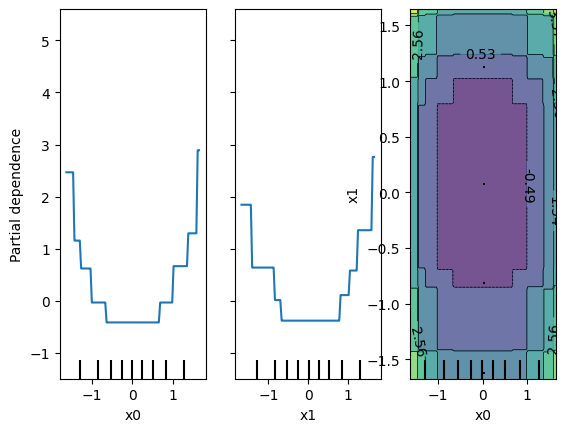

In [2]:
X, y = make_hastie_10_2(random_state=0)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X, y)
features = [0, 1, (0, 1)]
PartialDependenceDisplay.from_estimator(clf, X, features)

In [2]:
from ucimlrepo import fetch_ucirepo 
bikes = fetch_ucirepo(id = 275)

In [5]:
import pandas as pd
df = pd.DataFrame(bikes.data.features, columns=bikes.data.feature_names)

In [16]:
df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343


In [11]:
y = bikes.data.targets

In [25]:
from sklearn.inspection import permutation_importance
#svm on y for temp
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
X = df[["temp", "hum", "weekday","atemp"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#train
estimator = SVR(kernel="linear")
estimator.fit(X_train, y_train)
estimator.score(X_test, y_test)


/kuhpc/work/slusky/syasna_sta/.conda/envs/flax/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2056111397631677

In [26]:
initial_inspect = permutation_importance(estimator, X_test, y_test, n_repeats=30, random_state=0)

In [28]:
#plot permutation importance
print(initial_inspect.importances_mean)
#features are temp, hum, weekday, atemp
#atemp has lower PFI than temp, similar corr to cnt, why?


[0.09007403 0.12880802 0.00126235 0.06305646]


In [29]:
#concat x and y 
total_data = pd.concat([X, y], axis=1)
total_data.corr()

,temp,hum,weekday,atemp,cnt
temp,1.000000,-0.069881,-0.001795,0.987672,0.404772
hum,-0.069881,1.000000,-0.037158,-0.051918,-0.322911
weekday,-0.001795,-0.037158,1.000000,-0.008821,0.026900
atemp,0.987672,-0.051918,-0.008821,1.000000,0.400929
cnt,0.404772,-0.322911,0.026900,0.400929,1.000000
